# LOWESS Quick-Start

[![Binder](https://notebooks.gesis.org/binder/badge_logo.svg)](https://notebooks.gesis.org/binder/v2/gh/AyrtonB/Merit-Order-Effect/main?filepath=nbs%2Fug-08-lowess-quick-start.ipynb)

This guide will walk you through the key functionality provided in the `moepy` library: fitting smooth curves over data using LOWESS models. 

The original LOWESS model was developed by W. S. Cleveland in 1979 and the FORTRAN code for it can be found [here](https://www.netlib.org/go/lowess). LOWESS is an acronym for Locally Weighted Scatterplot Smoothing, whereby multiple regressions are fitted over different regions of the data domain and then combined based on weightings linked to the distance between the prediction point and the data used to fit each of the local regressions.

`moepy` exposes several variants on the traditional LOWESS,  including estimation of confidence and prediction intervals, as well as the robust LOWESS proposed by Cleveland in 1988. Examples  of how to use each of these is shown in this notebook.

### Imports

In [1]:
import numpy as np

import matplotlib.pyplot as plt

from moepy import lowess, eda

<br>

### Standard

We'll start by demonstrating the standard LOWESS implementation. First we'll create some dummy data to fit using a sin wave.

(0.0, 5.0)

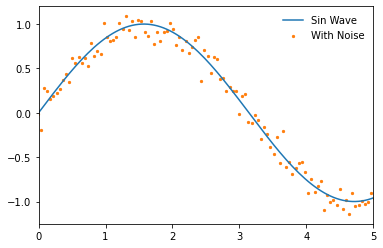

In [12]:
x = np.linspace(-1, 6, num=150)
y = np.sin(x)

y_noisy = y + (np.random.normal(size=len(y)))/10

plt.plot(x, y, label='Sin Wave', zorder=2)
plt.scatter(x, y_noisy, label='With Noise', color='C1', s=5, zorder=1)
plt.legend(frameon=False)
plt.xlim(0, 5)

<br>

We'll now instantiate our model and access the `fitted` attribute to show that it has not yet been trained

In [46]:
lowess_model = lowess.Lowess()

lowess_model.fitted

False

<br>

To demonstrate how the LOWESS model works we'll begin by fitting a model where only one local regression is made (specified using `num_fits=1`), all of the data is considered in the weighting (`frac=1`), and the local regression made is centred (`reg_anchors=np.array(2.5)`).

(0.0, 5.0)

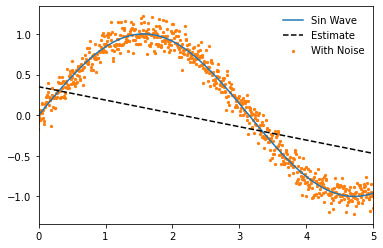

In [48]:
reg_anchors = np.array(2.5)

lowess_model.fit(x, y_noisy, frac=1, num_fits=1, reg_anchors=reg_anchors)

x_pred = np.linspace(-1, 6, 26)
y_pred = lowess_model.predict(x_pred)

# Plotting
plt.plot(x, y, label='Sin Wave', zorder=2)
plt.plot(x_pred, y_pred, '--', label='Estimate', color='k', zorder=3)
plt.scatter(x, y_noisy, label='With Noise', color='C1', s=5, zorder=1)
plt.legend(frameon=False)
plt.xlim(0, 5)

<br>

Our model will also now show that it has been fitted 

In [49]:
lowess_model.fitted

True

<br>

And we can access the design matrix for the local regression, in this case a single linear regression.

In [50]:
lowess_model.design_matrix

array([[ 0.34993848, -0.16417146]])

<br>

If we omit `num_fits` and `reg_anchors` when fitting the model then a local regression will be made at each unique point in the input dataset. If no `frac` is specified then it will fall back on it's default value of 0.4, where the nearest 40% of the data-points to the local regression will be used. 

(0.0, 5.0)

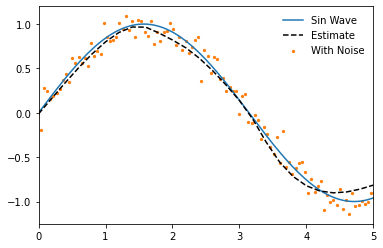

In [30]:
lowess_model.fit(x, y_noisy)

x_pred = np.linspace(0, 5, 26)
y_pred = lowess_model.predict(x_pred)

# Plotting
plt.plot(x, y, label='Sin Wave', zorder=2)
plt.plot(x_pred, y_pred, '--', label='Estimate', color='k', zorder=3)
plt.scatter(x, y_noisy, label='With Noise', color='C1', s=5, zorder=1)
plt.legend(frameon=False)
plt.xlim(0, 5)

<br>

It should be noted though that within the subset used for each local regression a further weighting is carried out so that those data-points that are closest to the point of estimation are weighted more heavily. For this reason we still generate a smoothed plot when `frac=1` if more than one local regression is made. 

(0.0, 5.0)

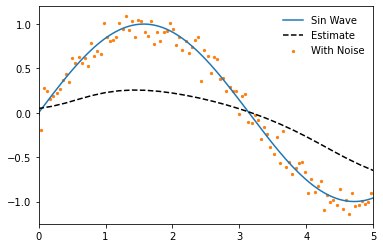

In [14]:
lowess_model.fit(x, y_noisy, frac=1)

x_pred = np.linspace(0, 5, 26)
y_pred = lowess_model.predict(x_pred)

# Plotting
plt.plot(x, y, label='Sin Wave', zorder=2)
plt.plot(x_pred, y_pred, '--', label='Estimate', color='k', zorder=3)
plt.scatter(x, y_noisy, label='With Noise', color='C1', s=5, zorder=1)
plt.legend(frameon=False)
plt.xlim(0, 5)

<br>

Decreasing the fraction will increase the flexibility of the model but make it more prone to overfitting.

(0.0, 5.0)

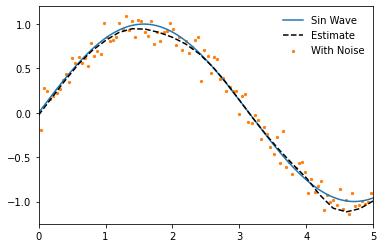

In [32]:
lowess_model.fit(x, y_noisy, frac=0.2)

x_pred = np.linspace(0, 5, 26)
y_pred = lowess_model.predict(x_pred)

# Plotting
plt.plot(x, y, label='Sin Wave', zorder=2)
plt.plot(x_pred, y_pred, '--', label='Estimate', color='k', zorder=3)
plt.scatter(x, y_noisy, label='With Noise', color='C1', s=5, zorder=1)
plt.legend(frameon=False)
plt.xlim(0, 5)

<br>

If we increase the number of data-points to be fitted and decrease the fraction further we can estimate an even closer fit. Note that we can achieve a very close approximation to a sin wave even though under the hood it is still using only linear methods!

(0.0, 5.0)

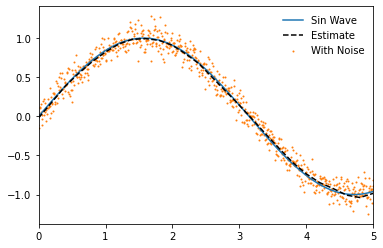

In [52]:
# Data generation
x = np.linspace(-1, 6, num=1000)
y = np.sin(x)
y_noisy = y + (np.random.normal(size=len(y)))/10

# Model fitting
lowess_model.fit(x, y_noisy, frac=0.15, num_fits=25)

# Model prediction
x_pred = np.linspace(0, 5, 26)
y_pred = lowess_model.predict(x_pred)

# Plotting
plt.plot(x, y, label='Sin Wave', zorder=2)
plt.plot(x_pred, y_pred, '--', label='Estimate', color='k', zorder=3)
plt.scatter(x, y_noisy, label='With Noise', color='C1', s=1, zorder=1)
plt.legend(frameon=False)
plt.xlim(0, 5)

<br>

One of the benefits of the `moepy` implementation of the LOWESS model is that it gives us access to the underlying model data. We'll quickly fit a model on a smaller number of points to make this example a bit clearer.

In [68]:
x = np.linspace(-1, 6, num=25)
y = np.sin(x)

y_noisy = y + (np.random.normal(size=len(y)))/10

lowess_model = lowess.Lowess()
lowess_model.fit(x, y_noisy)

<br>

One of the model attributes we can extract is the locations of each local regression using `weighting_locs`.

In [69]:
weighting_locs = lowess_model.weighting_locs

print(f'There are {len(weighting_locs)} weighting locations')

weighting_locs[:5]

There are 25 weighting locations


array([[-1.        ],
       [-0.70833333],
       [-0.41666667],
       [-0.125     ],
       [ 0.16666667]])

<br>

As was shown before we can also access the design matrix containing the coefficients of each local regression model. In this example we'll take a single local model, plot the linear regression it fitted, and visualise the relative weighting of different points on that regression.

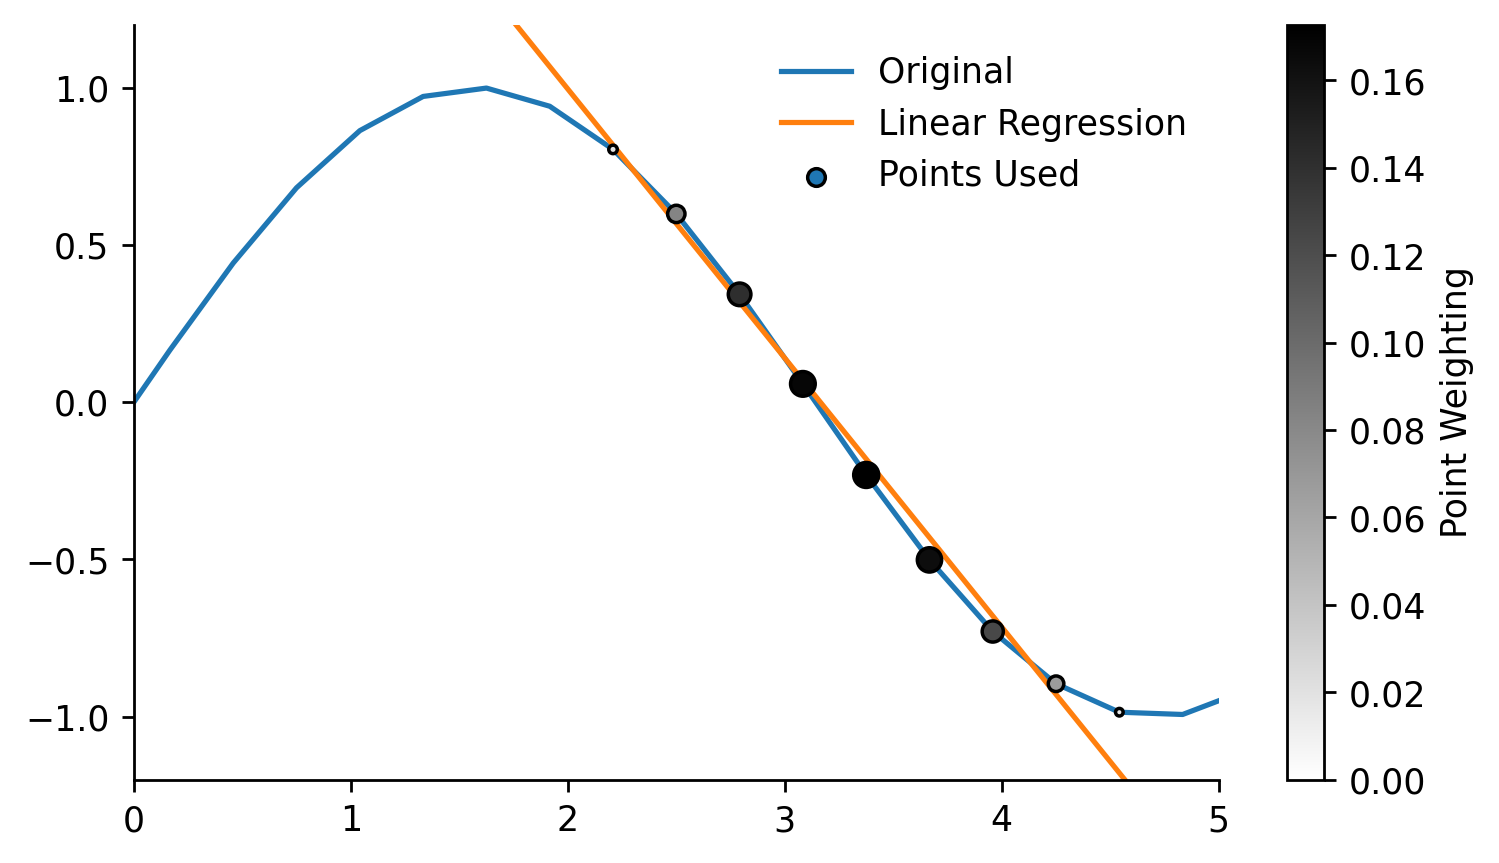

In [74]:
local_model_idx = 15

local_loading_weights = lowess_model.loading_weights[local_model_idx]
intercept, gradient = lowess_model.design_matrix[local_model_idx]

x_used = x[x*local_loading_weights>0]
y_used = y[x*local_loading_weights>0]
x_weights = local_loading_weights[x*local_loading_weights>0]

## Plotting
fig, ax = plt.subplots(dpi=250, figsize=(7, 4))

weighted_points = ax.scatter(x, y, s=(local_loading_weights)*300, c=local_loading_weights, edgecolor='k', cmap='gray_r', label='Points Used', zorder=3, vmin=0)
cbar = fig.colorbar(weighted_points, label='Point Weighting')

ax.plot(x, y, label='Original')
ax.plot([x.min(), x.max()], [intercept+gradient*x.min(), intercept+gradient*x.max()], label='Linear Regression')

ax.set_ylim(-1.2, 1.2)
ax.set_xlim(0, 5)
eda.hide_spines(ax)

leg = ax.legend(frameon=False)

fig.savefig('../img/LOWESS_single_regression_example.png', dpi=250)

<br>

### Robust

By default robust regression is turned on so normally you should not have to think about it but in this example we'll look at what it actually does. We'll start by creating some test data relevant to this example, in particular one that contains some outliers.

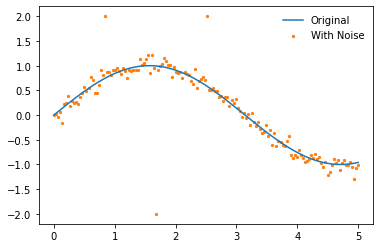

In [83]:
x = np.linspace(0, 5, num=150)
y = np.sin(x)
y_noisy = y + (np.random.normal(size=len(y)))/10

y_noisy[25] = 2
y_noisy[50] = -2
y_noisy[75] = 2

plt.plot(x, y, label='Original', zorder=2)
plt.scatter(x, y_noisy, label='With Noise', color='C1', s=5, zorder=1)
plt.legend(frameon=False)

<br>

We'll disable the robustifying procedure by specifying `robust_iters=0`, the influence of the outliers is clear.

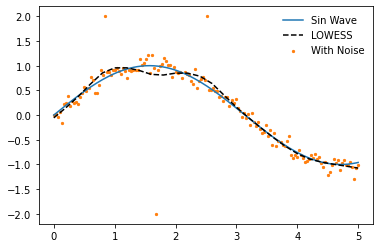

In [84]:
lowess_model.fit(x, y_noisy, frac=0.2, robust_iters=0)
y_pred = lowess_model.predict(x_pred)

plt.plot(x, y, label='Sin Wave', zorder=2)
plt.plot(x_pred, y_pred, '--', label='LOWESS', color='k', zorder=3)
plt.scatter(x, y_noisy, label='With Noise', color='C1', s=5, zorder=1)
plt.legend(frameon=False)

<br>

When using the robustifying procedure these outlier values are weighted less in each iteration. The default value of `robust_iters=3` is enough to remove most of the effect from the outliers in this example. The number of robustifying iterations can be increased but this will also increase the computation time of the model.

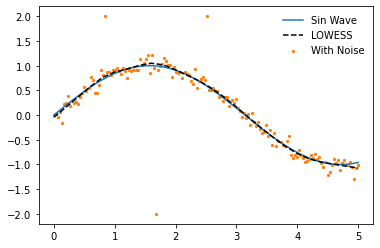

In [86]:
lowess_model.fit(x, y_noisy, frac=0.2)
y_pred = lowess_model.predict(x_pred)

plt.plot(x, y, label='Sin Wave', zorder=2)
plt.plot(x_pred, y_pred, '--', label='LOWESS', color='k', zorder=3)
plt.scatter(x, y_noisy, label='With Noise', color='C1', s=5, zorder=1)
plt.legend(frameon=False)

<br>

### Quantile

So far we have only looked at using LOWESS to ensemble local OLS models, the `moepy` library however enables the usage of other regression functions. In this section we'll look at how we can carry out locally weighted quantile regression.

The regression function used by the model can be determined by inspecting the `reg_func` attribute, the default being linear regression. 

In [45]:
lowess_model = lowess.Lowess()

lowess_model.reg_func

<function moepy.lowess.calc_lin_reg_betas(x, y, weights=None)>

<br>

We'll change this to the `calc_quant_reg_betas` function when instantiating a new model

In [90]:
quant_reg_func = lowess.calc_quant_reg_betas
quantile_model = lowess.Lowess(reg_func=quant_reg_func)

quantile_model.reg_func

<function moepy.lowess.<lambda>(x, y, q=0.5, x0=array([0., 0.]), weights=None, method='nelder-mead')>

<br>

We'll create a new noisy dataset that will better highlight the use of the quantile model. We'll introduce some heteroskedasticity (varying distribution) to the data.

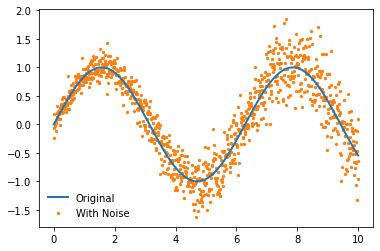

In [93]:
x = np.linspace(0, 10, num=1000)
y = np.sin(x)

heteroskedasticity_factor = (1 + 3*np.array(range(len(x)))/len(x))/10
y_noisy = y + heteroskedasticity_factor*(np.random.normal(size=len(y)))

# Plotting
plt.plot(x, y, label='Original', linewidth=2, zorder=2)
plt.scatter(x, y_noisy, label='With Noise', color='C1', s=5, zorder=1)
plt.legend(frameon=False)

<br>

Now let's fit the model! We use exactly the same API but have a new parameter `q` which relates to the quantile we wish to regress.

Wall time: 7.37 s


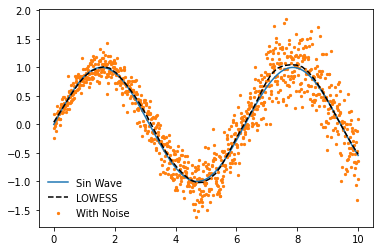

In [94]:
%%time

quantile_model.fit(x, y_noisy, frac=0.15, q=0.5, robust_iters=0)

x_pred = np.linspace(0, 10, 50)
y_pred = quantile_model.predict(x_pred)

# Plotting
plt.plot(x, y, label='Sin Wave', zorder=2)
plt.plot(x_pred, y_pred, '--', label='LOWESS', color='k', zorder=3)
plt.scatter(x, y_noisy, label='With Noise', color='C1', s=5, zorder=1)
plt.legend(frameon=False)

<br>

Fitting just the median of the data isn't very interesting though, the real value in quantile predictions comes when you make multiple of them and use them to calculate prediction intervals. A handy `quantile_model` function provides a wrapper for estimating multiple quantile models, the default of which will fit deciles.

In [95]:
df_quantiles = lowess.quantile_model(x, y_noisy, frac=0.2, num_fits=100, robust_iters=1)

df_quantiles.head()

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:07<00:00,  1.28it/s]


quantiles,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
x,,,,,,,,,
0.00000,-0.049330,-0.000075,0.027684,0.059175,0.077140,0.093140,0.127091,0.159124,0.224578
0.01001,-0.042483,0.007075,0.034911,0.066520,0.084740,0.101018,0.134882,0.166927,0.232327
0.02002,-0.035638,0.014220,0.042136,0.073863,0.092335,0.108890,0.142671,0.174729,0.240073
0.03003,-0.028791,0.021360,0.049359,0.081205,0.099926,0.116758,0.150459,0.182533,0.247816
0.04004,-0.021942,0.028498,0.056583,0.088548,0.107517,0.124623,0.158250,0.190339,0.255558


<br>

We can now visualise the prediction interval

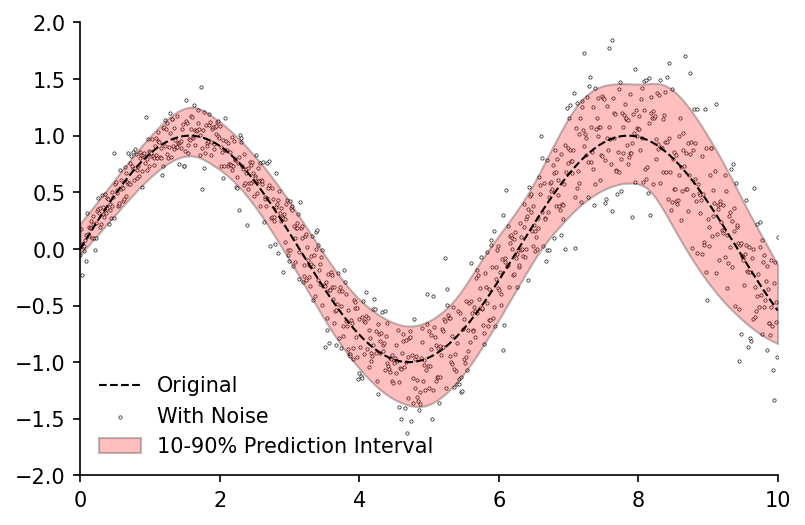

In [96]:
fig, ax = plt.subplots(dpi=150)

ax.plot(x, y, 'k--', label='Original', linewidth=1, zorder=2)
ax.scatter(x, y_noisy, label='With Noise', color='w', edgecolor='k', linewidth=0.3, s=2.5, zorder=1)
ax.fill_between(df_quantiles.index, df_quantiles[0.1], df_quantiles[0.9], color='r', edgecolor='k', alpha=0.25, label='10-90% Prediction Interval')

ax.legend(frameon=False, loc=3)
ax.set_xlim(0, 10)
ax.set_ylim(-2, 2)
eda.hide_spines(ax)

<br>

### Confidence

Prediction intervals capture just one type of uncertainty, namely the uncertainty around the estimation of any single data-point. But what if we wish to determine the uncertainty around the parameters we've estimated (e.g. the average)? For this we can use confidence intervals.

The `bootstrap_model` function provides a wrapper for fitting multiple models on different subsets of the data (bootstrapping), it returns a dataframe of the estimated curve from each subset.

In [32]:
df_bootstrap = lowess.bootstrap_model(
    x, 
    y_noisy, 
    num_runs=1000, 
    model=lowess.Lowess(), 
    frac=0.2, 
    num_fits=20
)

df_bootstrap.head()

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 103.79it/s]


bootstrap_run,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
x,,,,,,,,,,,,,,,,,,,,,
0.00000,0.201351,0.144480,0.145314,0.174008,0.067483,0.171813,0.147632,0.118480,0.049836,0.120671,...,0.071988,0.091529,0.127914,0.109467,0.055393,0.048548,0.048767,0.169435,0.121099,0.158459
0.02004,0.213548,0.157691,0.157366,0.185430,0.080968,0.183531,0.160215,0.132095,0.066425,0.134342,...,0.086620,0.105465,0.142032,0.123263,0.072007,0.064238,0.063858,0.182103,0.134463,0.170474
0.04008,0.225732,0.170884,0.169408,0.196842,0.094440,0.195237,0.172781,0.145702,0.082996,0.148010,...,0.101241,0.119388,0.156134,0.137053,0.088623,0.079926,0.078920,0.194753,0.147801,0.182480
0.06012,0.237906,0.184061,0.181440,0.208243,0.107898,0.206931,0.185333,0.159304,0.099550,0.161677,...,0.115853,0.133302,0.170220,0.150836,0.105240,0.095614,0.093956,0.207387,0.161114,0.194477
0.08016,0.250079,0.197222,0.193478,0.219634,0.121381,0.218625,0.197905,0.172924,0.116126,0.175341,...,0.130500,0.147286,0.184293,0.164614,0.121883,0.111301,0.108966,0.220006,0.174406,0.206481


<br>

We can then use the `get_confidence_interval` function to calculate the confidence interval from our bootstrapped estimates. In this example we would expect the average value at any point along the curve to fall into the red band 95% of the time.

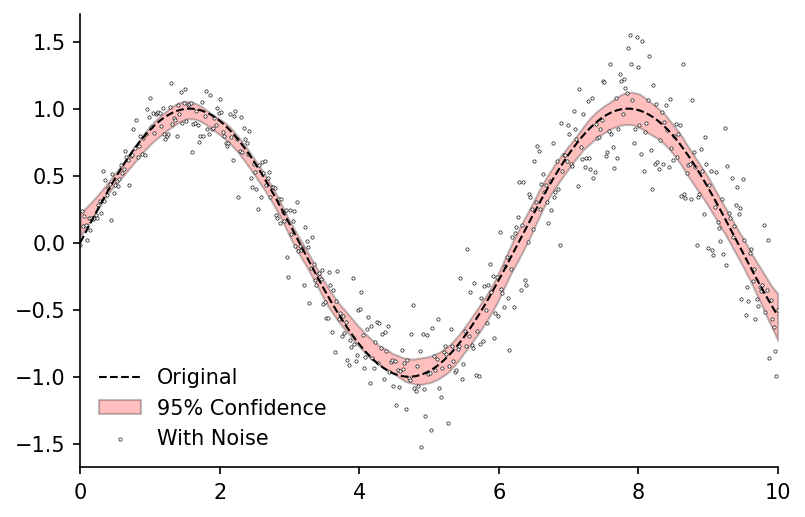

In [36]:
df_conf_intvl = lowess.get_confidence_interval(df_bootstrap, conf_pct=0.95)

# Plotting
fig, ax = plt.subplots(dpi=150)

ax.plot(x, y, 'k--', label='Original', linewidth=1, zorder=2)
ax.fill_between(df_conf_intvl.index, df_conf_intvl['min'], df_conf_intvl['max'], color='r', edgecolor='k', alpha=0.25, label='95% Confidence')
ax.scatter(x, y_noisy, label='With Noise', color='w', edgecolor='k', linewidth=0.3, s=2.5, zorder=1)

ax.legend(frameon=False)
ax.set_xlim(0, 10)
eda.hide_spines(ax)